# 疑似相関の確認

In [1]:
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

In [2]:
import scipy.stats

from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline

## ZからYへ因果が存在する場合

変数Z&rarr;変数Y

In [3]:
# ノイズを生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y   #ここにZの値が影響している＝＞相関がある

# ZとYの相関関係を求める
np.corrcoef(Z, Y)

array([[1.        , 0.89379611],
       [0.89379611, 1.        ]])

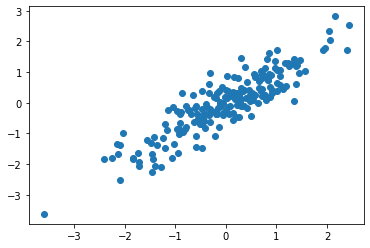

In [4]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std,Y_std)

## 疑似相関：因果が逆

In [5]:
# ノイズを生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Y = e_y
Z = 2*Y + e_z   #ここにZの値が影響している＝＞相関がある

# ZとYの相関関係を求める
np.corrcoef(Z, Y)

array([[1.        , 0.90390263],
       [0.90390263, 1.        ]])

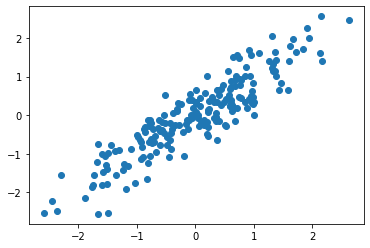

In [6]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std,Y_std)

横軸：Z、縦軸：Y  
**因果関係が逆でも相関係数が大きい場合があり**、**データの見た目からは因果関係の向きを読み取れない**

## 疑似相関：共通の原因

In [7]:
# ノイズを生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
Z = 3.3*e_x + e_z
Y = 3.3*e_x + e_y

np.corrcoef(Z, Y)

array([[1.        , 0.90572419],
       [0.90572419, 1.        ]])

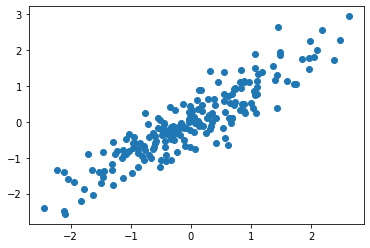

In [8]:
# 標準化
Z2_std = scipy.stats.zscore(Z)
Y2_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z2_std,Y2_std)

直接因果関係がなくても、共通変数がある場合には、間接的な因果関係が発生し、相関係数が大きくなる場合がある。

**これもデータの描画からは読み取ることができない**

## 疑似相関：合流地点での選抜

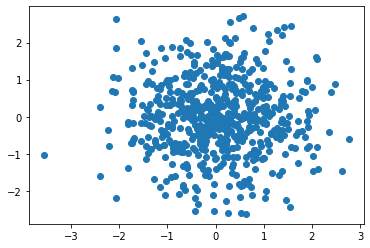

In [4]:
# 選抜前のデータを作成し、描画

# ノイズ
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
x = e_x
y = e_y

# 散布図を描画
plt.scatter(x, y)

散布図から相関係数がないことがわかる

In [5]:
# 相関係数を求める
np.corrcoef(x,y)

array([[ 1.        , -0.00697605],
       [-0.00697605,  1.        ]])

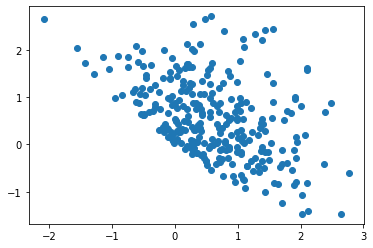

In [6]:
# 合流点で選抜を行うプログラム

# 合流点を作成
Z = x+y

# 新たなん合流点で条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# Zの値が０以上で選抜してnew変数に追加する
for i in range(num_data):
    if Z[i] > 0.0:
        x_new = np.append(x_new, x[i])
        y_new = np.append(y_new, y[i])

# 散布図
plt.scatter(x_new, y_new)

In [7]:
np.corrcoef(x_new, y_new)

array([[ 1.        , -0.45268717],
       [-0.45268717,  1.        ]])

負の相関関係が見て取れる

関係がない変数でも、$x+y=Z$で合流し、選抜される操作によって、直接関連がなくてもZを介して疑似相関が発生する
